<a id="p2"></a>

### Find the Frog, Find the Fish


<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

In [1]:
# Opensource code
# Prep to import images

import urllib.request

# Text file of image URLs
text_file = "https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-canvas-images/main/unit_4/sprint_challenge_files/frog_image_url.txt"
data = urllib.request.urlopen(text_file)

# Create list of image URLs
url_list = []
for line in data:
    url_list.append(line.decode('utf-8'))

In [11]:
# Opensource code
# Import images

from skimage.io import imread
from skimage.transform import resize
image_list = []
# instantiate list to hold images

#loop through URLs and load each image
for url in url_list:
  image_list.append(imread(url))

#What is an "image"?
print(type(image_list[0]), end="\n\n")
print("Each of the Images is a Different Size")
print(image_list[0].shape)
print(image_list[1].shape)

<class 'numpy.ndarray'>

Each of the Images is a Different Size
(2137, 1710, 3)
(3810, 2856, 3)


In [4]:
for i in range(len(image_list)):
  image_list[i] = resize(image_list[i], (224, 224))

### Run ResNet50v2

Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. You can print out or view the predictions in any way you see fit. In order to receive credit, you need to have made predictions at some point in the following cells.

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

**Autograded tasks**

* Instantiate your ResNet 50v2 and save to a variable named `resnet_model`

**Other tasks**
* Re-size your images
* Use `resnet_model` to predict if each image contains a frog
* Decode your predictions
* Hint: the lesson on CNNs will have some helpful code

**Stretch goals***
* Check for other things such as fish
* Print out the image with its predicted label
* Wrap everything nicely in well documented functions

## Important note!

To increase the chances that your notebook will run in CodeGrade, when you **submit** your notebook:

* comment out the code where you load the images
* comment out the code where you make the predictions
* comment out any plots or image displays you create

**MAKE SURE YOUR NOTEBOOK RUNS COMPLETELY BEFORE YOU SUBMIT!**

In [5]:
# Imports
from tensorflow.keras.applications.resnet_v2 import ResNet50V2 # <-- pre-trained model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import decode_predictions # preprocess_input

In [6]:
# instantiate pretrained ResNet50 model
resnet_model = ResNet50V2(weights='imagenet')

102869336/102869336 [==============================] - 1s 0us/step


In [7]:
import numpy as np
import matplotlib.pyplot as plt # - commenting out plots for codegrade

def img_contains_frog(img):
    """
    Imputs image into resnet50 pre-trained model and returns the top 3 likely labels for the image (ranked by largest probability)
    """
    # preprocess image
    x = img.copy() #image.img to array x
    plt.imshow(x) # - comment out plots to prevent plotting
    plt.show() # - comment plots to prevent plotting

    x = np.expand_dims(x, axis=0)
    # x = preprocess_input(x) # preprocess_input not used in this case
    # print('x.shape after preprocess_input ',x.shape)

    # instantiate pretrained ResNet50 model
    # resnet_model = ResNet50V2(weights='imagenet') # - INSTANTIATED outside of funct

    # get classification of image
    features = resnet_model.predict(x)
    # print('shape of predictions ',features.shape)

    # docs: https://www.tensorflow.org/api_docs/python/tf/keras/applications/imagenet_utils/decode_predictions
    results = decode_predictions(features, top=3)[0]

    # return True if 'frog' is among the top 3 predictions
    detected_frog = False
    for entry in results:
        # print(entry)
        if entry[1] == 'bullfrog' or entry[1] == 'tree_frog' or entry[1] == 'tailed_frog':
            detected_frog = True
    print(detected_frog)
    return detected_frog


In [8]:

def img_contains_fish(img):
    """
    Imputs image into resnet50 pre-trained model and returns the top 3 likely labels for the image (ranked by largest probability)
    """
    # preprocess image
    x = img.copy() #image.img to array x
    plt.imshow(x) # - comment out plots to prevent plotting
    plt.show() # - comment plots to prevent plotting

    x = np.expand_dims(x, axis=0)
    # x = preprocess_input(x) # preprocess_input not used in this case
    # print('x.shape after preprocess_input ',x.shape)

    # instantiate pretrained ResNet50 model
    # resnet_model = ResNet50V2(weights='imagenet') # - INSTANTIATED outside of funct

    # get classification of image
    features = resnet_model.predict(x)
    # print('shape of predictions ',features.shape)

    # docs: https://www.tensorflow.org/api_docs/python/tf/keras/applications/imagenet_utils/decode_predictions
    results = decode_predictions(features, top=3)[0]

    # return True if 'fish' is among the top 3 predictions
    detected_fish = False
    for entry in results:
        # print(entry)
        if entry[1] == 'fish':
            detected_fish = True
    print(detected_fish)
    return detected_fish

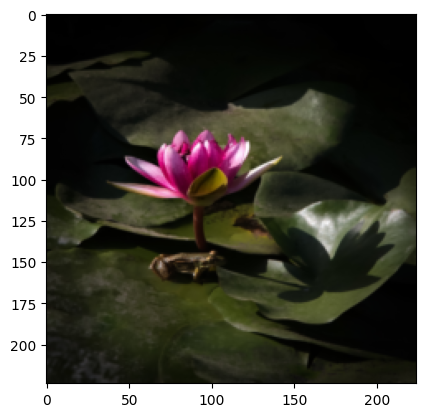

35363/35363 [==============================] - 0s 0us/step
False


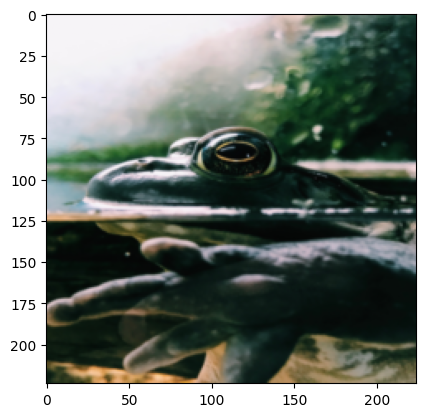

1/1 [==============================] - 0s 36ms/step
True


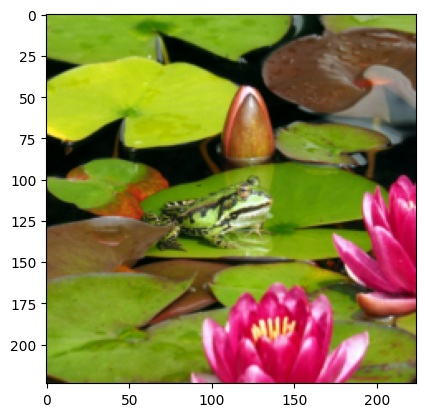

1/1 [==============================] - 0s 41ms/step
False


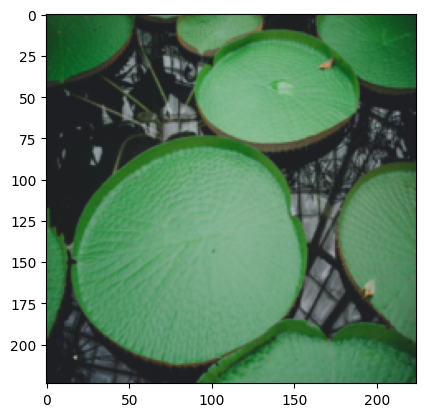

1/1 [==============================] - 0s 46ms/step
False


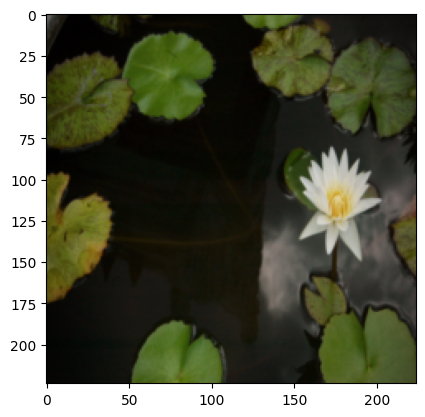

1/1 [==============================] - 0s 38ms/step
False


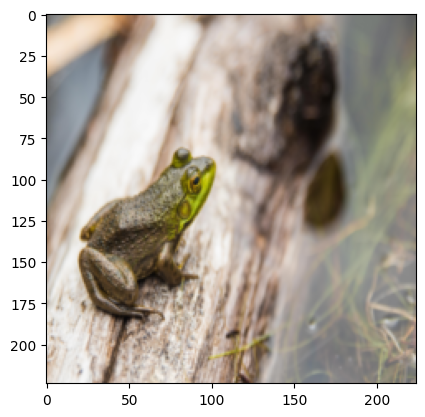

1/1 [==============================] - 0s 39ms/step
True


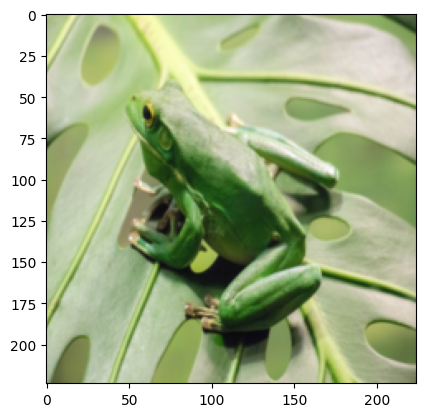

1/1 [==============================] - 0s 41ms/step
True


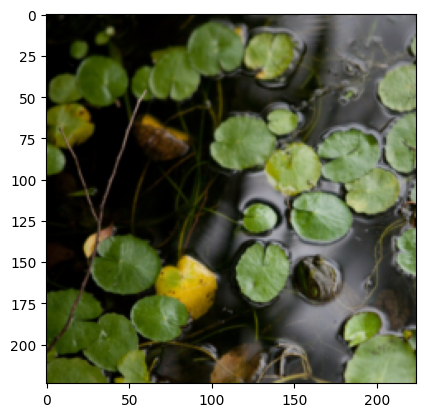

1/1 [==============================] - 0s 47ms/step
True


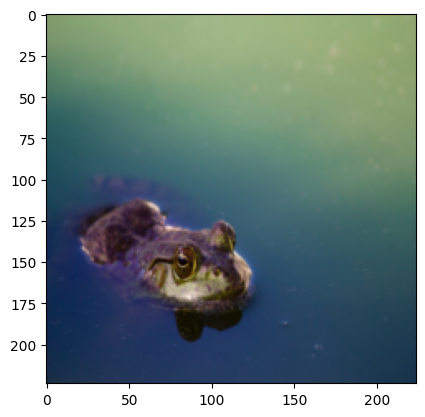

1/1 [==============================] - 0s 43ms/step
True


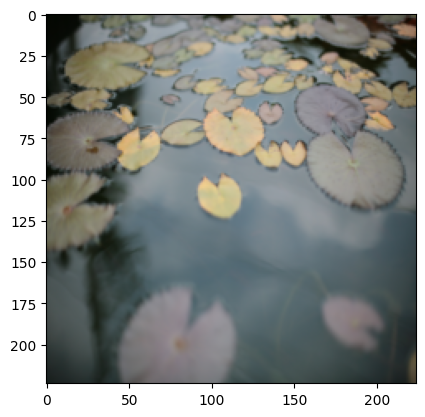

1/1 [==============================] - 0s 65ms/step
False


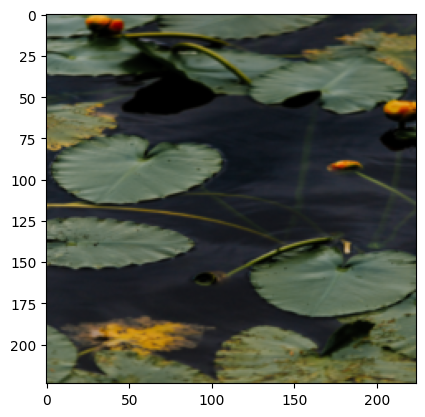

1/1 [==============================] - 0s 43ms/step
True


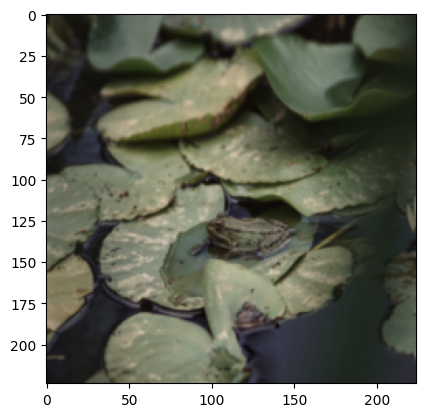

1/1 [==============================] - 0s 57ms/step
False


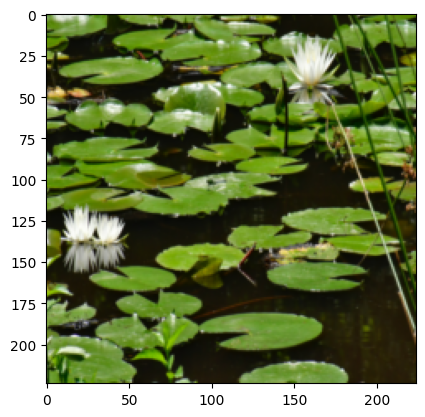

1/1 [==============================] - 0s 45ms/step
False


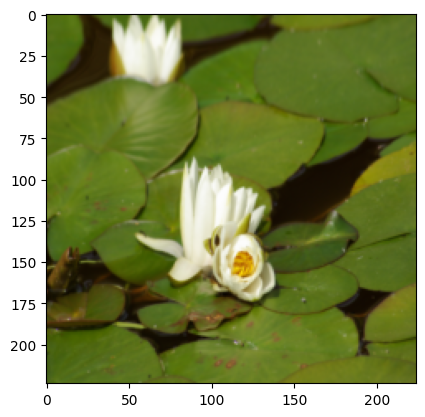

1/1 [==============================] - 0s 36ms/step
False


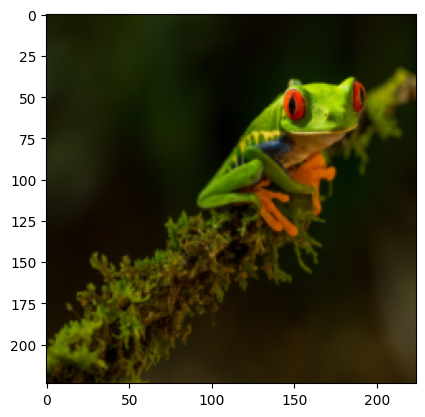

1/1 [==============================] - 0s 39ms/step
True


In [9]:
for i in image_list:
  img_contains_frog(i)

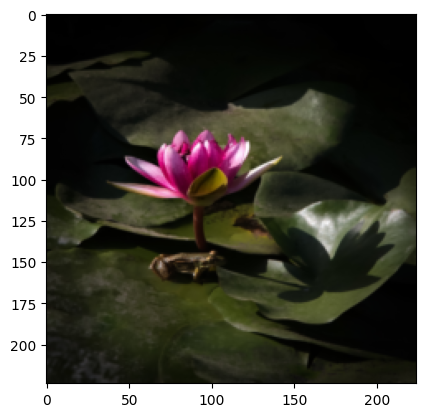

1/1 [==============================] - 0s 29ms/step
False


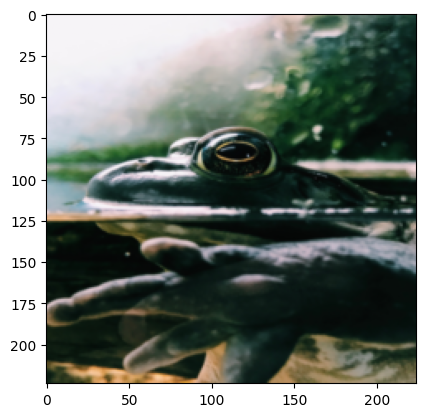

1/1 [==============================] - 0s 30ms/step
False


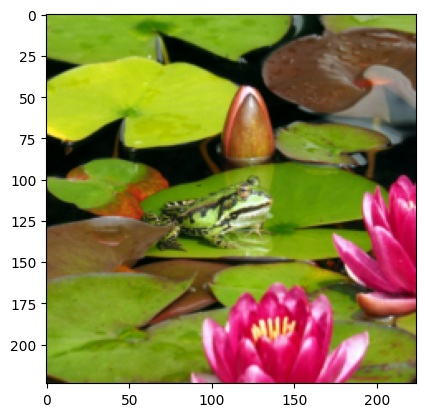

1/1 [==============================] - 0s 38ms/step
False


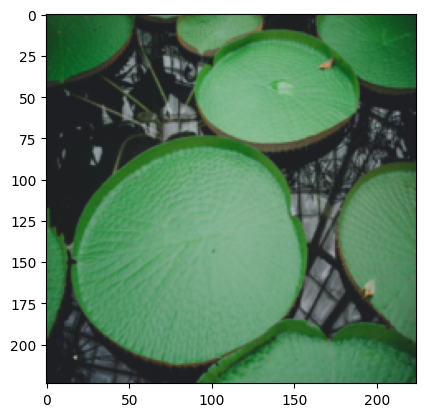

1/1 [==============================] - 0s 42ms/step
False


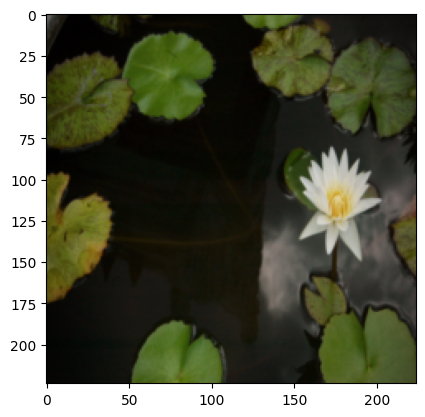

1/1 [==============================] - 0s 31ms/step
False


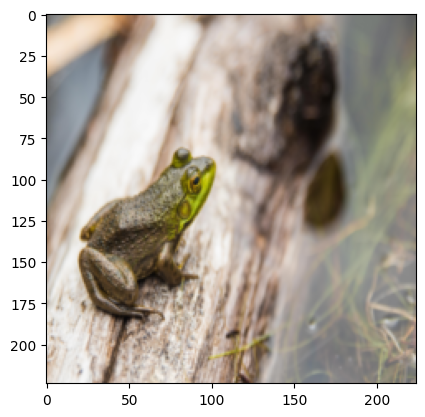

1/1 [==============================] - 0s 44ms/step
False


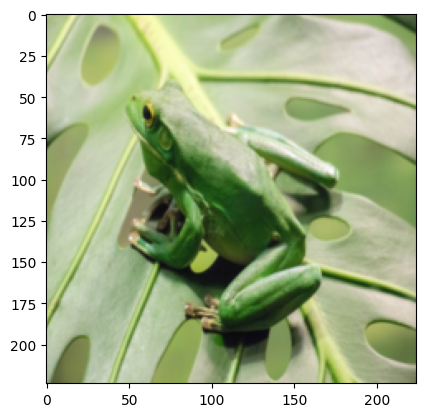

1/1 [==============================] - 0s 41ms/step
False


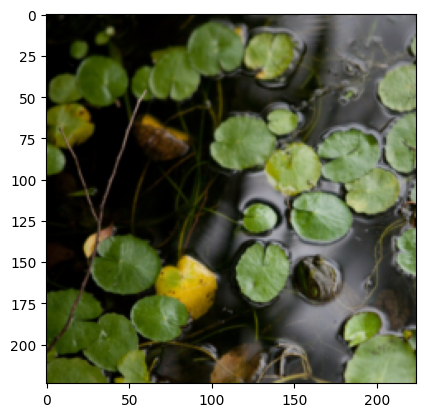

1/1 [==============================] - 0s 67ms/step
False


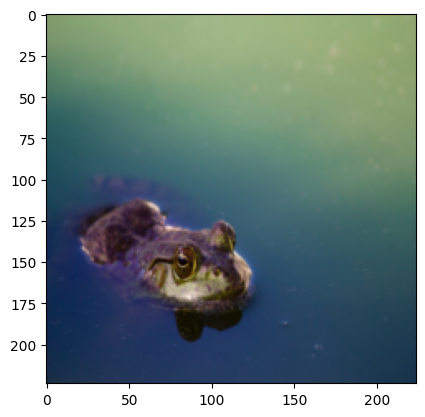

1/1 [==============================] - 0s 42ms/step
False


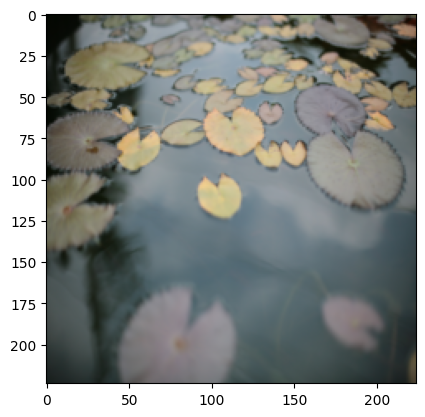

1/1 [==============================] - 0s 67ms/step
False


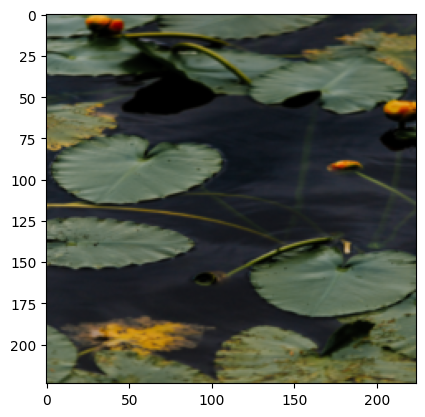

1/1 [==============================] - 0s 44ms/step
False


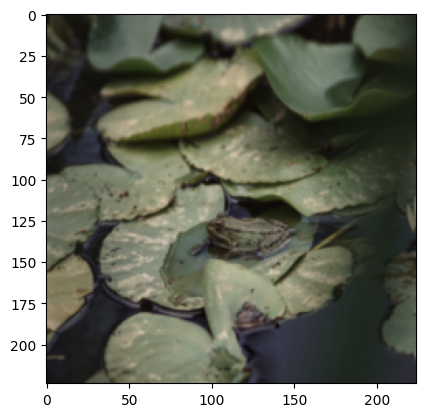

1/1 [==============================] - 0s 50ms/step
False


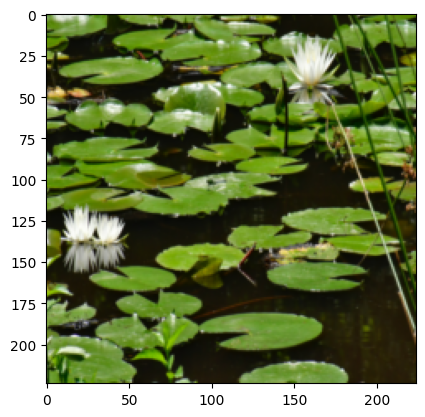

1/1 [==============================] - 0s 53ms/step
False


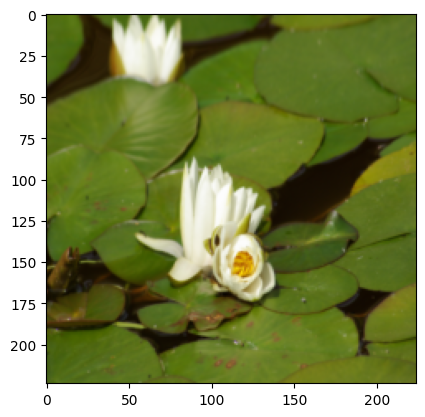

1/1 [==============================] - 0s 50ms/step
False


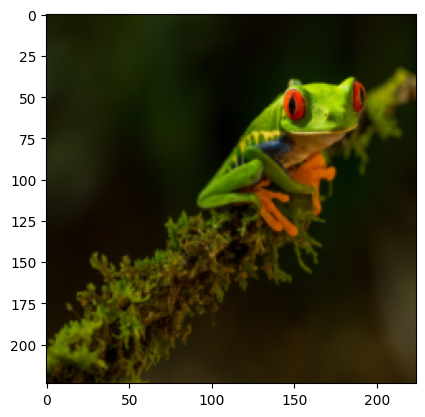

1/1 [==============================] - 0s 39ms/step
False


In [10]:
for i in image_list:
  img_contains_fish(i)